# Importação de bibliotecas
Fonte: https://dados.gov.br/

In [472]:
import requests
import os.path
import json
import pandas as pd
import ssl
import urllib3
import matplotlib

matplotlib.style.use('fivethirtyeight') 

def cachear(apelido_arquivo, url_open_data, file_open_data):
    ssl._create_default_https_context = ssl._create_unverified_context
    urllib3.disable_warnings()
    print( '1. Cache de arquivo {0} esta carregado {1}'.format(apelido_arquivo, os.path.isfile(file_open_data)) )
    if not os.path.isfile(file_open_data):
        r = requests.get(url_open_data, allow_redirects=True, verify=False)
        open(file_open_data, 'wb').write(r.content)    

def importar_dados_open_json(apelido_arquivo, url_open_data, file_open_data):
    cachear(apelido_arquivo, url_open_data, file_open_data)

    print('2. Lendo arquivo JSON')
    json_raw_open_data = None
    with open(file_open_data, encoding="utf8") as f:
        json_raw_open_data = json.load(f)

    print( '3. Arquivo lido com total de registros {0}'.format(len(json_raw_open_data['value'])) )
    json_open_data = json_raw_open_data['value']    
    return pd.json_normalize(json_open_data)

def importar_dados_open_csv(apelido_arquivo, url_open_data, file_open_data):
    cachear(apelido_arquivo, url_open_data, file_open_data)

    print('2. Lendo arquivo CSV')
    data_csv = pd.read_csv(file_open_data)
    print( '3. Arquivo lido com total de registros {0}'.format( len(data_csv.index) ) )
    return data_csv

# Importação dos dados SUSEP Grupos de produtos
https://dados.susep.gov.br/olinda/servico/empresas/versao/v1/odata/DominioMercado?$format=json

In [473]:
url_open_data_seguradoras = "https://dados.susep.gov.br/olinda/servico/empresas/versao/v1/odata/DominioMercado?$format=json"
file_open_data_seguradoras = "C:\\Users\\dev01\\Desktop\\Ciencia de Dados\\open_data_susep_grupos_produtos"

data_frame_json_open_data_grupos_produtos = importar_dados_open_json('SUSEP Grupos de produtos',url_open_data_seguradoras,file_open_data_seguradoras)
data_frame_json_open_data_grupos_produtos.sample(3)

1. Cache de arquivo SUSEP Grupos de produtos esta carregado False
2. Lendo arquivo JSON
3. Arquivo lido com total de registros 8


,Codigo,Descricao
2,3,Resseguradora Local
6,7,Resseguradora Eventual
1,2,Seguros


# Importação dos dados SUSEP Seguradoras
http://dados.susep.gov.br/olinda-ide/servico/despesasoperacionais/versao/v1/odata/DespesasSeguros(Ano=@Ano)?@Ano='2019'&$format=json

In [474]:
url_open_data_seguradoras = "http://dados.susep.gov.br/olinda-ide/servico/despesasoperacionais/versao/v1/odata/DespesasSeguros(Ano=@Ano)?@Ano='2019'&$format=json"
file_open_data_seguradoras = "C:\\Users\\dev01\\Desktop\\Ciencia de Dados\\open_data_susep_seguradoras"

data_frame_json_open_data_seguradoras = importar_dados_open_json('SUSEP Seguradoras',url_open_data_seguradoras,file_open_data_seguradoras)
data_frame_json_open_data_seguradoras.sample(3)

1. Cache de arquivo SUSEP Seguradoras esta carregado False
2. Lendo arquivo JSON
3. Arquivo lido com total de registros 57002


,entnome,cnpj,mesreferencia,grupo,ramo,valor
8593,BANESTES SEGUROS S.A.,27053230000175,2019-02-01,01,71,0.00
29962,ITAU SEGUROS DE AUTO E RESIDÊNCIA S.A.,08816067000100,2019-11-01,02,34,0.00
21518,FAIRFAX BRASIL SEGUROS CORPORATIVOS S.A.,10793428000192,2019-08-01,06,21,549673.42


# Importação dos dados SUSEP Produtos
http://dados.susep.gov.br/olinda-ide/servico/produtos/versao/v1/odata/DadosProdutos?$format=text/csv

In [499]:
url_open_data_produtos = "http://dados.susep.gov.br/olinda-ide/servico/produtos/versao/v1/odata/DadosProdutos?$format=text/csv"
file_open_data_produtos = "C:\\Users\\dev01\\Desktop\\Ciencia de Dados\\open_data_susep_produtos"

data_frame_json_open_data_produtos = importar_dados_open_csv('SUSEP Produtos', url_open_data_produtos, file_open_data_produtos)
data_frame_json_open_data_produtos.sample(3)

1. Cache de arquivo SUSEP Produtos esta carregado True
2. Lendo arquivo CSV
3. Arquivo lido com total de registros 19000


,tipoproduto,entnome,cnpj,numeroprocesso,ramo,subramo
5992,TÍTULO DE CAPITALIZAÇÃO,CAPEMISA CAPITALIZAÇÃO S.A.,14056028000155,15414.902095/2019-21,CAP | MODALIDADE FILANTROPIA PREMIÁVEL,PAGAMENTO ÚNICO
10645,TÍTULO DE CAPITALIZAÇÃO,INVEST CAPITALIZAÇÃO S.A.,93202448000179,15414.902383/2019-86,CAP | MODALIDADE FILANTROPIA PREMIÁVEL,PAGAMENTO ÚNICO
11051,PLANO DE SEGURO DE DANOS,INVESTPREV SEGURADORA S.A.,42366302000128,15414.901448/2015-42,01 | RISCOS DIVERSOS,EQUIPAMENTOS


# Normalização dos dados
https://dados.gov.br/dataset/consulta-de-produtos

In [500]:
def normalizar_ramo(row):
    column = str(row[4])
    strip_row = column.split('|') if (not column == None) and len(column) > 0  else ()
    return str("" if len(strip_row) <= 1 else str((strip_row[0].replace(" ", ""))))

def normalizar_ramo_nome(row):
    column = str(row[4])
    strip_row = column.split('|') if (not column == None) and len(column) > 0  else ()
    return str("" if len(strip_row) <= 1 else str((strip_row[1].replace(" ", ""))))

print('4. Adicionando coluna ramo_produto no SUSEP Produtos')
data_frame_json_open_data_produtos['ramo_produto'] = data_frame_json_open_data_produtos.apply(normalizar_ramo, axis = 1)
data_frame_json_open_data_produtos = data_frame_json_open_data_produtos[ data_frame_json_open_data_produtos['ramo_produto'].str.isnumeric() ]
data_frame_json_open_data_produtos['codigo_ramo_produto'] = data_frame_json_open_data_produtos.apply(lambda row: int(row[6]) , axis = 1)

print('5. Convertendo a coluna grupo_produto no SUSEP Seguradoras')
data_frame_json_open_data_seguradoras['codigo_grupo_produto'] = data_frame_json_open_data_seguradoras.apply(lambda row: int(row[3]) , axis = 1)

print('6. Convertendo a coluna codigo_grupo no Grupos de produtos')
data_frame_json_open_data_grupos_produtos['codigo_grupo'] = data_frame_json_open_data_grupos_produtos.apply(lambda row: int(row[0]) , axis = 1)

print('7. Convertendo a coluna codigo_ramo no SUSEP Seguradoras')
data_frame_json_open_data_seguradoras['codigo_ramo'] = data_frame_json_open_data_seguradoras.apply(lambda row: int(row[4]) , axis = 1)

print('8. Convertendo a coluna cnpj_formatado no SUSEP Seguradoras')
data_frame_json_open_data_seguradoras['cnpj_formatado'] = data_frame_json_open_data_seguradoras.apply(lambda row: str(row[1]).zfill(14) , axis = 1)

print('9. Convertendo a coluna cnpj_formatado no SUSEP Produtos')
data_frame_json_open_data_produtos['cnpj_formatado'] = data_frame_json_open_data_produtos.apply(lambda row: str(row[2]).zfill(14) , axis = 1)

print('10. Adicionando coluna ramo_produto_nome no SUSEP Produtos')
data_frame_json_open_data_produtos['ramo_produto_nome'] = data_frame_json_open_data_produtos.apply(normalizar_ramo_nome, axis = 1)

4. Adicionando coluna ramo_produto no SUSEP Produtos
5. Convertendo a coluna grupo_produto no SUSEP Seguradoras
6. Convertendo a coluna codigo_grupo no Grupos de produtos
7. Convertendo a coluna codigo_ramo no SUSEP Seguradoras
8. Convertendo a coluna cnpj_formatado no SUSEP Seguradoras
9. Convertendo a coluna cnpj_formatado no SUSEP Produtos
10. Adicionando coluna ramo_produto_nome no SUSEP Produtos


# Junção Grupo x Produto x Seguradora

In [501]:
data_frame_seguradora_grupo = pd.merge(left=data_frame_json_open_data_seguradoras, right=data_frame_json_open_data_grupos_produtos, left_on='codigo_grupo_produto', right_on='codigo_grupo')
data_frame_seguradora_grupo_produtos = pd.merge(left=data_frame_seguradora_grupo, right=data_frame_json_open_data_produtos, left_on=['cnpj_formatado','codigo_ramo'], right_on=['cnpj_formatado','codigo_ramo_produto'])
print( '11. Data Frames mergeados total de registros {0}'.format( len(data_frame_seguradora_grupo_produtos.index) ) )
data_frame_seguradora_grupo_produtos.sample(3)

11. Data Frames mergeados total de registros 6295


,entnome_x,cnpj_x,mesreferencia,grupo,ramo_x,valor,codigo_grupo_produto,codigo_ramo,cnpj_formatado,Codigo,...,codigo_grupo,tipoproduto,entnome_y,cnpj_y,numeroprocesso,ramo_y,subramo,ramo_produto,codigo_ramo_produto,ramo_produto_nome
5452,PORTO SEGURO COMPANHIA DE SEGUROS GERAIS,61198164000160,2019-12-01,03,13,0.0,3,13,61198164000160,3,...,3,PLANO DE SEGURO DE PESSOAS,PORTO SEGURO COMPANHIA DE SEGUROS GERAIS,61198164000160,15414.902105/2019-29,13 | PRESTAMISTA - BILHETE (INDIVIDUAL),NÃO APLICÁVEL,13,13,PRESTAMISTA-BILHETE(INDIVIDUAL)
5625,PRUDENTIAL DO BRASIL SEGUROS DE VIDA S.A,33061813000140,2019-08-01,03,13,0.0,3,13,33061813000140,3,...,3,PLANO DE SEGURO DE PESSOAS,PRUDENTIAL DO BRASIL SEGUROS DE VIDA S.A,33061813000140,15414.900814/2013-84,13 | VIDA (INDIVIDUAL),NÃO APLICÁVEL,13,13,VIDA(INDIVIDUAL)
1789,AXA SEGUROS S.A.,19323190000106,2019-10-01,01,15,0.0,1,15,19323190000106,1,...,1,PLANO DE SEGURO DE DANOS,AXA SEGUROS S.A.,19323190000106,15414.900666/2017-21,15 | AERONÁUTICOS - CASCO,NÃO APLICÁVEL,15,15,AERONÁUTICOS-CASCO


In [692]:
data_frame_seguradora_grupo_produtos_copy = data_frame_seguradora_grupo_produtos.copy()
data_frame_seguradora_grupo_produtos_copy.drop(['Codigo','entnome_y','grupo','ramo_x','ramo_y','subramo','ramo_produto','numeroprocesso','cnpj_y','cnpj_x','codigo_grupo','valor'], axis='columns', inplace=True)
data_frame_seguradora_grupo_produtos_copy.rename({"entnome_x": "empresa", "mesreferencia": "mes_referencia", "Descricao": "descricao_grupo_produto", "tipoproduto": "tipo_produto"}, inplace=True, axis=1)
data_frame_seguradora_grupo_produtos_copy.sample(3)

,empresa,mes_referencia,codigo_grupo_produto,codigo_ramo,cnpj_formatado,descricao_grupo_produto,tipo_produto,codigo_ramo_produto,ramo_produto_nome
4225,ZURICH MINAS BRASIL SEGUROS S.A.,2019-12-01,1,16,17197385000121,Previdência,PLANO DE MICROSSEGURO,16,MICROSSEGURODEPESSOAS
5938,TOKIO MARINE SEGURADORA S.A.,2019-04-01,3,10,33164021000100,Resseguradora Local,PLANO DE SEGURO DE DANOS,10,HABITACIONALEMAPÓLICEDEMERCADO
6144,ZURICH MINAS BRASIL SEGUROS S.A.,2019-08-01,3,13,17197385000121,Resseguradora Local,PLANO DE SEGURO DE PESSOAS,13,DESEMPREGO/PERDADERENDA(INDIVIDUAL)


# Agrupando Grupo x Produto x Seguradora

In [701]:
data_frame_grouped = data_frame_seguradora_grupo_produtos_copy.groupby(["codigo_grupo_produto", "codigo_ramo", "cnpj_formatado", "empresa","descricao_grupo_produto","tipo_produto","ramo_produto_nome"])
data_frame_grouped = data_frame_grouped.groups.keys()

grupos = ["codigo_grupo_produto", "codigo_ramo", "cnpj_formatado","empresa","descricao_grupo_produto","tipo_produto","ramo_produto_nome"]
todos_dados_seguradora_grupo_produto = [ dict(zip(grupos, group)) for group in list(data_frame_grouped)]

data_frame_todos_dados_seguradora_grupo_produto = pd.DataFrame(todos_dados_seguradora_grupo_produto)
data_frame_todos_dados_seguradora_grupo_produto=data_frame_todos_dados_seguradora_grupo_produto.reindex(columns=['codigo_grupo_produto','descricao_grupo_produto','codigo_ramo','ramo_produto_nome','tipo_produto','cnpj_formatado','empresa'])
data_frame_todos_dados_seguradora_grupo_produto.sort_values(by=['codigo_grupo_produto', 'codigo_ramo','tipo_produto','empresa'], ascending=True)

print("12. Total de registros {0}".format(len(data_frame_todos_dados_seguradora_grupo_produto.index)))
data_frame_todos_dados_seguradora_grupo_produto.sample(3)

12. Total de registros 332


,codigo_grupo_produto,descricao_grupo_produto,codigo_ramo,ramo_produto_nome,tipo_produto,cnpj_formatado,empresa
178,1,Previdência,16,MICROSSEGURODEDANOS,PLANO DE MICROSSEGURO,33164021000100,TOKIO MARINE SEGURADORA S.A.
123,1,Previdência,15,AERONÁUTICOS-CASCO,PLANO DE SEGURO DE DANOS,01378407000110,ALIANÇA DO BRASIL SEGUROS S.A.
59,1,Previdência,11,PENHORRURAL,PLANO DE SEGURO DE DANOS,61198164000160,PORTO SEGURO COMPANHIA DE SEGUROS GERAIS


# Filtrando somente Seguros

13. Total de registros 332


<AxesSubplot:xlabel='empresa'>

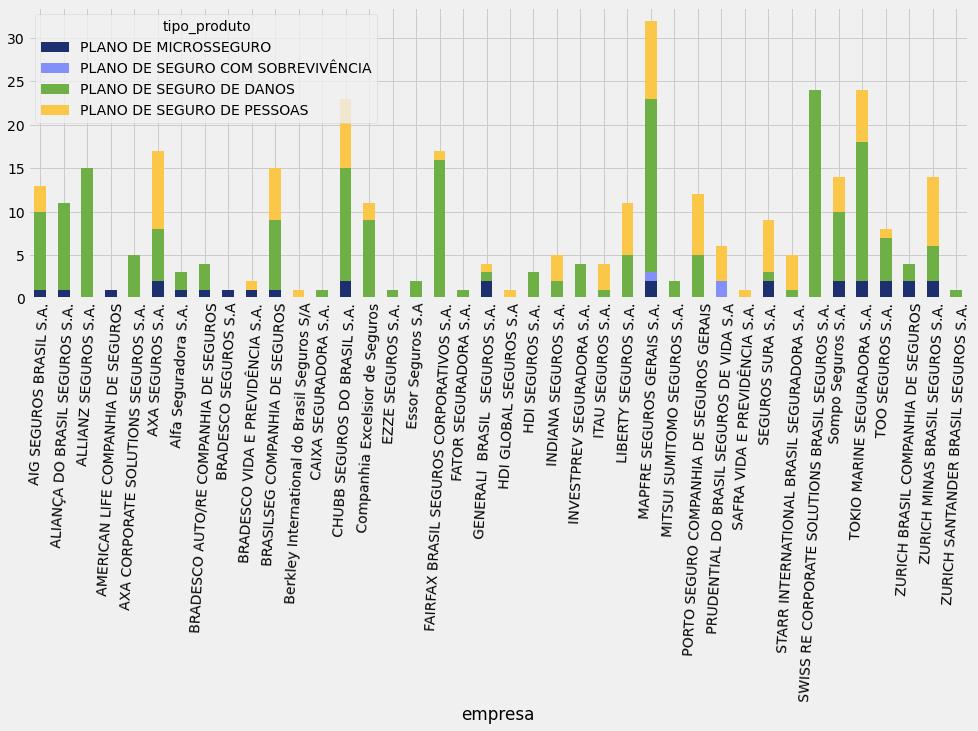

In [703]:
print("13. Total de registros {0}".format(len(data_frame_todos_dados_seguradora_grupo_produto.index)))
data_frame_todos_dados_seguradora_grupo_produto.sample(5)

data_frame_todos_dados_seguradora_grupo_produto_copy = data_frame_todos_dados_seguradora_grupo_produto.copy().groupby(['tipo_produto','empresa'])['empresa'].count().unstack('tipo_produto')
data_frame_todos_dados_seguradora_grupo_produto_copy.sort_values(by=['empresa'],ascending=True).plot.bar(stacked=True,color=colors,rot=87, figsize=(15, 5))

In [698]:
produtos_seguros_brasil = "C:\\Users\\dev01\\Desktop\\Ciencia de Dados\\open_data_produtos_seguros_brasil.csv"
data_frame_todos_dados_seguradora_grupo_produto.to_csv(produtos_seguros_brasil)